In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

In [ ]:
data={
    'stud_id':range(1,101),
    'grades':np.random.randint(50,100,100),
    'study_hours':np.random.randint(1,10,100),
    'Attendance_percent':np.random.randint(1,100,100),
    'Div':np.random.randint(1,3,100)
}

df=pd.DataFrame(data)
df.head()

,stud_id,grades,study_hours,Attendance_percent,Div
0,1,88,9,55,1
1,2,78,8,75,2
2,3,64,1,56,1
3,4,92,8,17,2
4,5,57,8,38,2


In [ ]:
df['grades'][40:50]=np.nan
df['study_hours'][25:30]=25
df['Attendance_percent'][5:10]=-1

<ipython-input-4-ec8905b126aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['study_hours'][25:30]=25
<ipython-input-4-ec8905b126aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attendance_percent'][5:10]=-1


In [ ]:
df.head(10)

,stud_id,grades,study_hours,Attendance_percent,Div
0,1,88.0,9,55,1
1,2,78.0,8,75,2
2,3,64.0,1,56,1
3,4,92.0,8,17,2
4,5,57.0,8,38,2
5,6,70.0,3,-1,2
6,7,88.0,1,-1,2
7,8,68.0,8,-1,2
8,9,72.0,3,-1,1
9,10,60.0,3,-1,1


In [ ]:
df['Attendance_percent']=np.where((df['Attendance_percent']<0),0,df['Attendance_percent'])


In [ ]:
df.head(10)

,stud_id,grades,study_hours,Attendance_percent,Div
0,1,88.0,9,55,1
1,2,78.0,8,75,2
2,3,64.0,1,56,1
3,4,92.0,8,17,2
4,5,57.0,8,38,2
5,6,70.0,3,0,2
6,7,88.0,1,0,2
7,8,68.0,8,0,2
8,9,72.0,3,0,1
9,10,60.0,3,0,1


In [ ]:
df.dtypes

stud_id                 int64
grades                float64
study_hours             int64
Attendance_percent      int64
Div                     int64
dtype: object

In [ ]:
df.isna().sum()

stud_id                0
grades                10
study_hours            0
Attendance_percent     0
Div                    0
dtype: int64

In [ ]:
df['grades'].fillna(df['grades'].mean(),inplace=True)

In [ ]:
df.isna().sum()

stud_id               0
grades                0
study_hours           0
Attendance_percent    0
Div                   0
dtype: int64

In [ ]:
df.head(10)

,stud_id,grades,study_hours,Attendance_percent,Div
0,1,88.0,9,55,1
1,2,78.0,8,75,2
2,3,64.0,1,56,1
3,4,92.0,8,17,2
4,5,57.0,8,38,2
5,6,70.0,3,0,2
6,7,88.0,1,0,2
7,8,68.0,8,0,2
8,9,72.0,3,0,1
9,10,60.0,3,0,1


In [ ]:
def find_outliers(df,column):
  outliers=[]
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lb = Q1 - 1.5*IQR
  ub = Q3 + 1.5*IQR
  outs = df[(df[column]<lb) | (df[column]>ub)]
  print(outs)
  for i in df[column]:
    if(( i < lb) | (i > ub) ):
      outliers.append(i)
    else:
      continue

  return outliers


In [ ]:
ans = find_outliers(df,'study_hours')
# print("The outliers in the study hours are as follows: ",ans)

    stud_id  grades  study_hours  Attendance_percent  Div
25       26    61.0           25                  19    2
26       27    71.0           25                  20    1
27       28    93.0           25                  96    2
28       29    74.0           25                  71    1
29       30    98.0           25                  52    2


<Axes: ylabel='study_hours'>

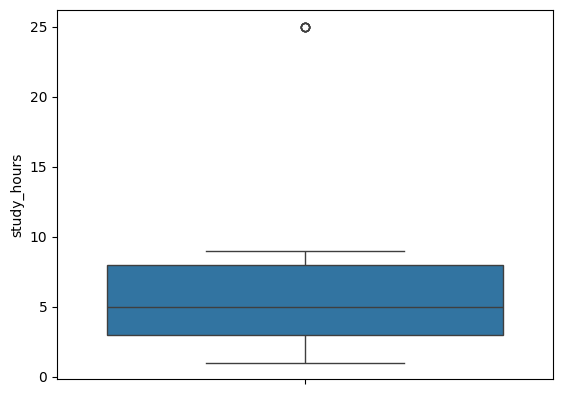

In [ ]:
sns.boxplot(data=df['study_hours'])

In [ ]:
def remove_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lb = Q1 - 1.5*IQR
  ub = Q3 + 1.5*IQR
  df[column] = np.where((df[column]<lb) | (df[column]>ub),np.nan,df[column])
  return df[column]

In [ ]:
df['study_hours']=remove_outliers(df,'study_hours')

df.head(10)

,stud_id,grades,study_hours,Attendance_percent,Div
0,1,88.0,9.0,55,1
1,2,78.0,8.0,75,2
2,3,64.0,1.0,56,1
3,4,92.0,8.0,17,2
4,5,57.0,8.0,38,2
5,6,70.0,3.0,0,2
6,7,88.0,1.0,0,2
7,8,68.0,8.0,0,2
8,9,72.0,3.0,0,1
9,10,60.0,3.0,0,1


In [ ]:
df.isnull().sum()

stud_id               0
grades                0
study_hours           5
Attendance_percent    0
Div                   0
dtype: int64

In [ ]:
df['study_hours'].fillna(df['study_hours'].mean(),inplace=True)


In [ ]:
df.isnull().sum()

stud_id               0
grades                0
study_hours           0
Attendance_percent    0
Div                   0
dtype: int64

In [ ]:
df.head(5)

,stud_id,grades,study_hours,Attendance_percent,Div
0,1,88.0,9.0,55,1
1,2,78.0,8.0,75,2
2,3,64.0,1.0,56,1
3,4,92.0,8.0,17,2
4,5,57.0,8.0,38,2


In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
vals = df['grades'].values.reshape(-1,1)
print(vals)
scaled = sc.fit_transform(vals)
df['grades'] = scaled
df['grades']

[[88.        ]
 [78.        ]
 [64.        ]
 [92.        ]
 [57.        ]
 [70.        ]
 [88.        ]
 [68.        ]
 [72.        ]
 [60.        ]
 [60.        ]
 [73.        ]
 [85.        ]
 [89.        ]
 [73.        ]
 [52.        ]
 [71.        ]
 [51.        ]
 [73.        ]
 [93.        ]
 [79.        ]
 [87.        ]
 [51.        ]
 [70.        ]
 [82.        ]
 [61.        ]
 [71.        ]
 [93.        ]
 [74.        ]
 [98.        ]
 [76.        ]
 [91.        ]
 [77.        ]
 [65.        ]
 [64.        ]
 [96.        ]
 [93.        ]
 [52.        ]
 [86.        ]
 [56.        ]
 [74.46666667]
 [74.46666667]
 [74.46666667]
 [74.46666667]
 [74.46666667]
 [74.46666667]
 [74.46666667]
 [74.46666667]
 [74.46666667]
 [74.46666667]
 [51.        ]
 [69.        ]
 [77.        ]
 [96.        ]
 [56.        ]
 [93.        ]
 [57.        ]
 [96.        ]
 [84.        ]
 [63.        ]
 [66.        ]
 [85.        ]
 [99.        ]
 [89.        ]
 [53.        ]
 [51.        ]
 [55.     

0     0.990068
1     0.258491
2    -0.765718
3     1.282699
4    -1.277822
        ...   
95   -0.765718
96    1.429015
97   -1.789927
98   -0.034140
99   -1.350980
Name: grades, Length: 100, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
change = df['study_hours'].values.reshape(-1,1)
model.fit(change)
print("The max value is: " + str(model.data_max_))
print("The min value is: " + str(model.data_min_))
df['study_hours']=model.transform(change)
df['study_hours']

The max value is: [9.]
The min value is: [1.]


0     1.000
1     0.875
2     0.000
3     0.875
4     0.875
      ...  
95    0.125
96    0.500
97    0.625
98    0.750
99    0.375
Name: study_hours, Length: 100, dtype: float64